# Read me

This code is about Bias detection analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Clean Contact Dataset

In [5]:
contact_dataset = pd.read_csv('clean_contact_dataset.csv', encoding='latin', low_memory=False)
contact_dataset.shape

(41747, 392)

In [6]:
#analysis_dataset.isna().sum()

In [7]:
demo_features = ['MailingState','Gender__c','Service_Branch__c','Last_Service_Rank','Reserves_National_Guard__c','Military_Spouse_Caregiver__c','Highest_Level_of_Education_Completed__c']
actions_features = ['Hire_Heroes_USA_Confirmed_Hire__c','O2O_Initial_Assessment_Complete__c','Finalized_HHUSA_revised_resume_on_file__c','Resume_Tailoring_Tips__c','Value_Proposition__c','Interview_Skills__c','Created_LinkedIn_account__c','On_Job_Board__c','Virtual_Workshop_Participant__c','VCF_Participant__c','Used_Volunteer_Services__c','Used_Federal_Services__c','Hired_with_EO_assistance__c','Updated_Resume_Complete__c','HHUSA_Workshop_Participant__c','Is_the_Initial_Intake_Assessment_done__c','Permission_to_use_job_board_granted__c','Resume_Completed_By__c']
analysis_dataset = contact_dataset[demo_features + actions_features]
print(analysis_dataset.shape)
analysis_dataset.head()

(41747, 25)


,MailingState,Gender__c,Service_Branch__c,Last_Service_Rank,Reserves_National_Guard__c,Military_Spouse_Caregiver__c,Highest_Level_of_Education_Completed__c,Hire_Heroes_USA_Confirmed_Hire__c,O2O_Initial_Assessment_Complete__c,Finalized_HHUSA_revised_resume_on_file__c,...,Virtual_Workshop_Participant__c,VCF_Participant__c,Used_Volunteer_Services__c,Used_Federal_Services__c,Hired_with_EO_assistance__c,Updated_Resume_Complete__c,HHUSA_Workshop_Participant__c,Is_the_Initial_Intake_Assessment_done__c,Permission_to_use_job_board_granted__c,Resume_Completed_By__c
0,Georgia,Male,Army,E,0,0,"4 Year Degree (BA, BS, etc.)",0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,005380000063Mg0AAE
1,Michigan,Male,Army,E,1,0,High School/GED,0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,00550000001zVqjAAE
2,Idaho,Male,Army,E,1,0,High School/GED,1,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,00538000005F2ADAA0
3,North Carolina,Male,Army,E,0,0,"4 Year Degree (BA, BS, etc.)",0,0.0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,00550000001zVqjAAE
4,Georgia,Male,Navy,E,0,0,"4 Year Degree (BA, BS, etc.)",0,0.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,005380000063Mg0AAE


## Histogram

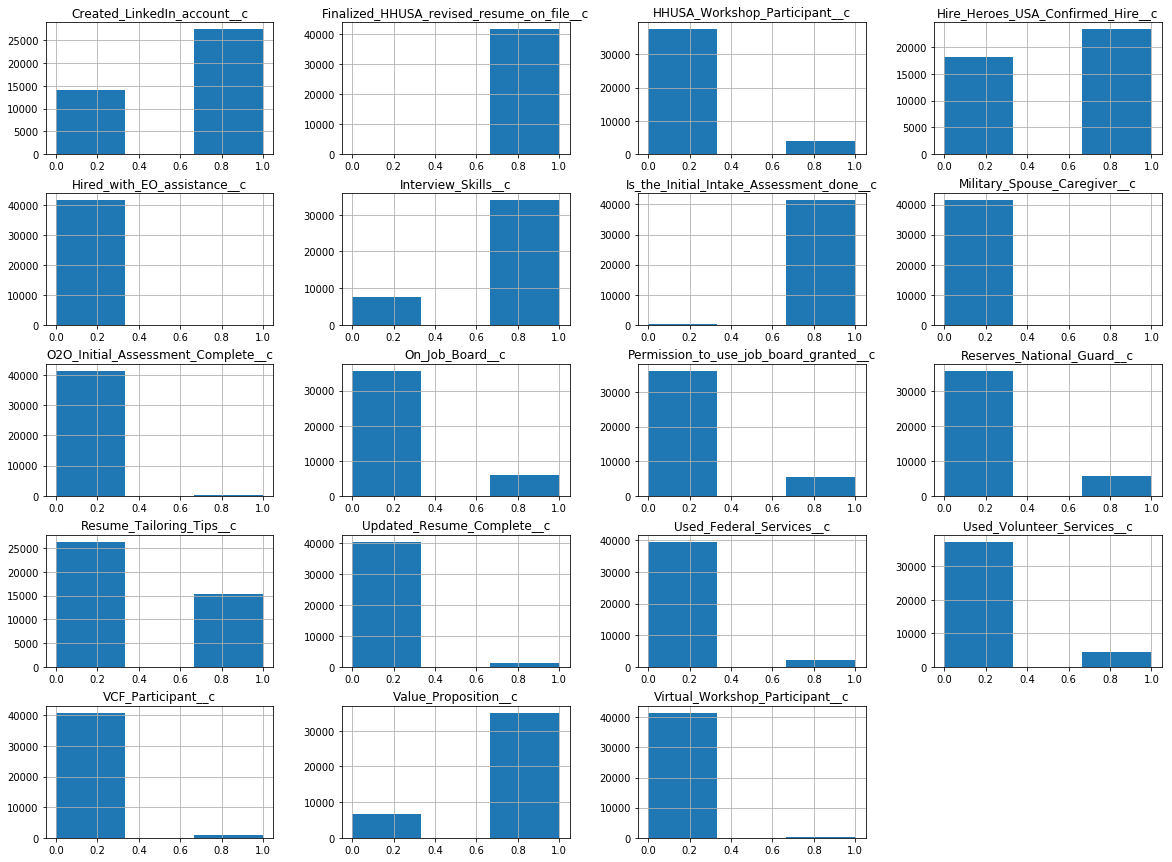

In [8]:
analysis_dataset.hist(bins=3, figsize=(20,15))
plt.show()

## General Methods

In [26]:
def count_table(feature, data):
    data_by_feature = data.groupby(feature)
    countTable = data_by_feature[feature].agg(['count'])
    total_feature = countTable.values.sum()
    proportion = np.divide(countTable['count'], total_feature/100)
    countTable['%'] = proportion
    countTable = countTable.reset_index()
    return countTable.nlargest(50, 'count')

def summary(feature, data, classes=10):
    count_tables = count_table(feature, data)
    largest = count_tables.nlargest(classes, 'count')
    smallest = count_tables.nsmallest(classes, 'count')
    largest_plot = largest.plot(x = feature, y = '%', kind = 'bar', title = 'Largest')
    if(len(count_tables) > 10):
        smallest = count_tables.nsmallest(classes, 'count')
        smallest_plot = smallest.plot(x = feature, y = '%', kind = 'bar', title = 'Smallest')
    return count_tables
def compare(feature1, feature2, data):
    data0 = data.loc[data[feature2]==0]
    data1 = data.loc[data[feature2]==1]
    #print(data0.shape)
    #print(data1.shape)
    data0_by_feature = data0.groupby(feature1)
    data1_by_feature = data1.groupby(feature1)
    countTable0 = data0_by_feature[feature1].agg(['count'])
    countTable1 = data1_by_feature[feature1].agg(['count'])
    countTable0.rename(columns={'count': '0'}, inplace=True)
    countTable1.rename(columns={'count': '1'}, inplace=True)
    countTable = pd.merge(countTable0, countTable1, on=feature1)
    #total_feature = countTable.values.sum()
    #proportion = np.divide(countTable['count'], total_feature/100)
    countTable['Not Hired'] = countTable['0']/(countTable['0'] + countTable['1'])*100
    countTable['Hired'] = countTable['1']/(countTable['0'] + countTable['1'])*100
    countTable['Difference'] = countTable['Hired'] - countTable['Not Hired']
    countTable = countTable.reset_index()
    ind = np.arange(len(countTable))
    totals = [i+j for i,j in zip(countTable['0'], countTable['1'])]
    bar0 = [i / j * 100 for i,j in zip(countTable['0'], totals)]
    bar1 = [i / j * 100 for i,j in zip(countTable['1'], totals)]
    #print(bar0)
    #print(bar1)
    width = 0.9
    plt.figure(num=None, figsize=(3, 6), dpi=80, facecolor='w', edgecolor='k')
    p1 = plt.bar(ind, bar1, color='orange', width=width, label='1 = Hired')
    p2 = plt.bar(ind, bar0, color='blue', bottom=bar1, width=width, label='0 = Not Hired')
    plt.xticks(ind, countTable[feature1].values)
    plt.yticks(np.arange(0, 101, 10))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    plt.show()
    print("Difference in Hired =", abs(bar1[0]-bar1[1]))
    return countTable

# 1. Gender vs Hire

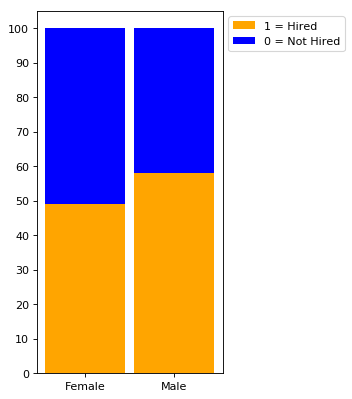

Difference in Hired = 8.934035898542191


,Gender__c,0,1,Not Hired,Hired,Difference
0,Female,3912,3767,50.944133,49.055867,-1.888267
1,Male,14312,19756,42.010097,57.989903,15.979805


In [27]:
compare('Gender__c', 'Hire_Heroes_USA_Confirmed_Hire__c', analysis_dataset)

# 2. Hire vs Volunteer Services

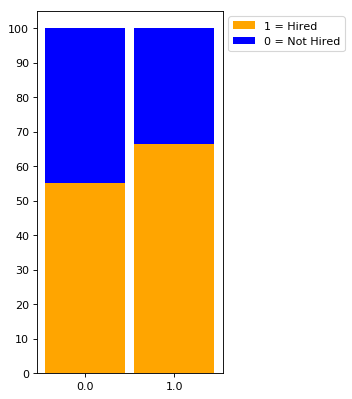

Difference in Hired = 11.209245657852541


,Used_Volunteer_Services__c,0,1,Not Hired,Hired,Difference
0,0.0,16765,20641,44.819013,55.180987,10.361974
1,1.0,1459,2882,33.609767,66.390233,32.780465


In [28]:
compare('Used_Volunteer_Services__c', 'Hire_Heroes_USA_Confirmed_Hire__c', analysis_dataset)